In [94]:
import os
os.getcwd()
os.chdir('C:/Users/Haidar/Desktop/Data Sets')
os.getcwd()

'C:\\Users\\Haidar\\Desktop\\Data Sets'

In [95]:
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('challenger.csv')
data

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [96]:
#assign o_ring failure values toan object
o_ring_failures=data['O.ring.failures']
o_ring_failures

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [97]:
#assign object for temp
temp=data['temperature']
temp

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

Text(0.5,0,'temp')

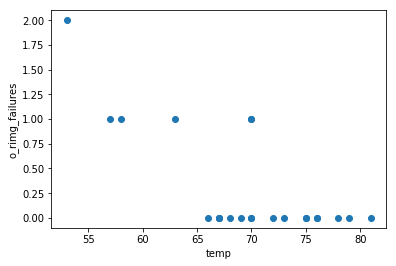

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(temp,o_ring_failures,'o')
plt.ylabel('o_rimg_failures')
plt.xlabel('temp')


In [99]:
data.corr() #finding relation bw temp pressure and o ring failures

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O.ring.failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [100]:
mean_o_ring_failure=data['O.ring.failures'].mean()
mean_o_ring_failure

0.30434782608695654

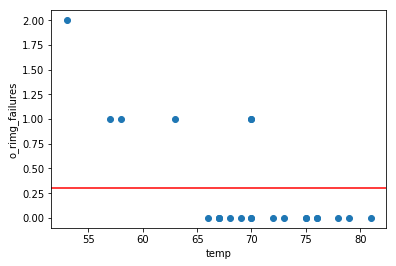

In [101]:
#to see how close or far the values are
plt.plot(temp,o_ring_failures,'o')
plt.ylabel('o_rimg_failures')
plt.xlabel('temp')
plt.axhline(mean_o_ring_failure,color='r',linestyle='-')
plt.show()


In [102]:
import statsmodels.api as sm
model=sm.OLS(o_ring_failures,temp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.755
Date:                Fri, 31 May 2019   Prob (F-statistic):             0.0402
Time:                        23:01:43   Log-Likelihood:                -19.595
No. Observations:                  23   AIC:                             41.19
Df Residuals:                      22   BIC:                             42.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0038      0.002      2.181      0.040       0.000       0.007
==============================================================================
Omnibus:                       14.053   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.853
Skew:                           1.623   Prob(JB):                      0.00162
Kurtosis:                       4.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
#for pressure
pressure=data['pressure']
pressure

0      50
1      50
2      50
3      50
4      50
5      50
6     100
7     100
8     200
9     200
10    200
11    200
12    200
13    200
14    200
15    200
16    200
17    200
18    200
19    200
20    200
21    200
22    200
Name: pressure, dtype: int64

In [104]:
model2=sm.OLS(o_ring_failures,pressure).fit()
model2.summary() #null hypotheisi is pressure small relation to oring failures,alternate is there is high relation bw them

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     8.278
Date:                Fri, 31 May 2019   Prob (F-statistic):            0.00875
Time:                        23:01:44   Log-Likelihood:                -18.173
No. Observations:                  23   AIC:                             38.35
Df Residuals:                      22   BIC:                             39.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pressure       0.0020      0.001      2.877      0.009       0.001       0.003
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.660
Skew:                           1.447   Prob(JB):                      0.00799
Kurtosis:                       4.306   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,0,'pressure')

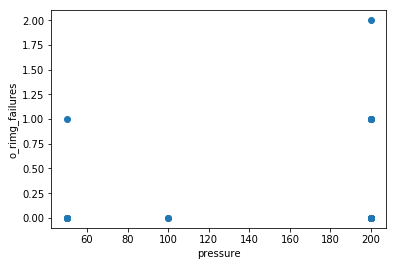

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pressure,o_ring_failures,'o')
plt.ylabel('o_rimg_failures')
plt.xlabel('pressure')


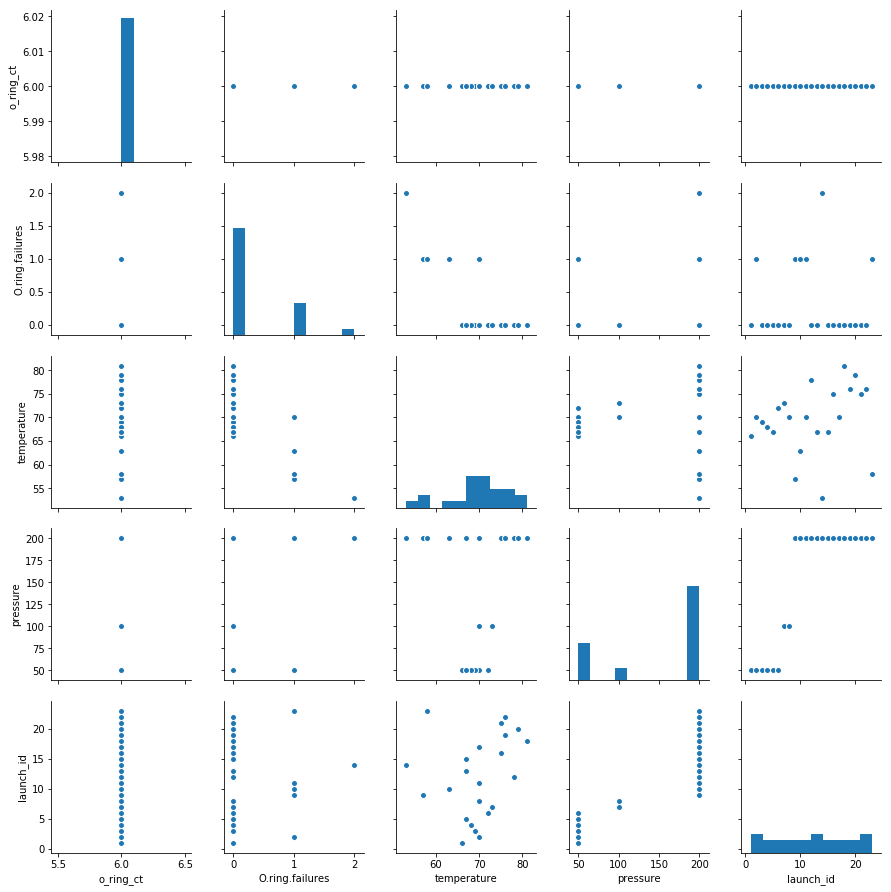

In [106]:
#advanced visualization
import seaborn as sns 
sns.pairplot(data)

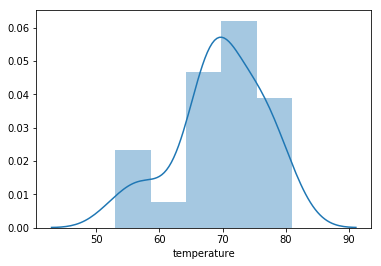

In [107]:
#distribution
sns.distplot(data['temperature'])

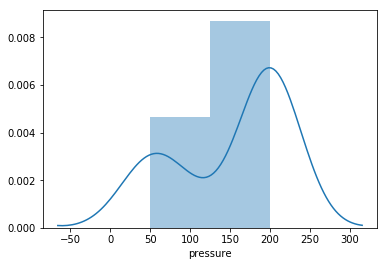

In [108]:
sns.distplot(data['pressure'])

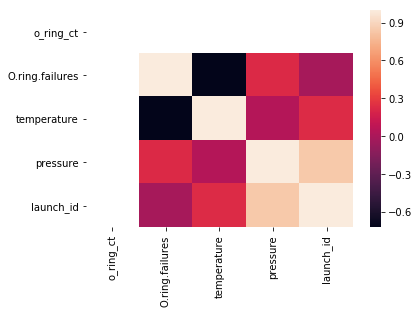

In [109]:
#for easy understanding for corr of millions of variable
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

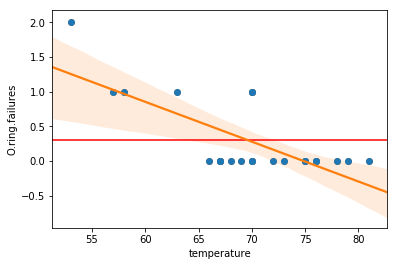

In [110]:
plt.plot(temp,o_ring_failures,'o')
plt.ylabel('o_rimg_failures')
plt.xlabel('temperature')
plt.axhline(mean_o_ring_failure,color='r',linestyle='-')
sns.regplot(x='temperature',y='O.ring.failures',data=data)



In [111]:
x=data['temperature'] #for multiple inputs x=data['temperature','pressure'] #feature engineering
y=data['O.ring.failures']

In [112]:
x

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

In [113]:
y

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [115]:
x_train

6     73
7     70
1     70
14    67
0     66
15    75
22    58
21    76
9     63
8     57
12    67
11    78
5     72
Name: temperature, dtype: int64

In [116]:
x_test

20    75
17    81
3     68
13    53
19    79
16    70
10    70
4     67
2     69
18    76
Name: temperature, dtype: int64

In [117]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O.ring.failures, dtype: int64

In [118]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
4     0
2     0
18    0
Name: O.ring.failures, dtype: int64

In [119]:
x_train=x_train.reshape((-1,1))
x_train

C:\Users\Haidar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]], dtype=int64)

In [120]:
#lR with sklearn (ML)
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x_train,y_train)


In [121]:
accuracy=model.score(x_train,y_train)
print('Accuracy of the model:',accuracy) #accuracy of output genetrated

Accuracy of the model: 0.49669252207783493


In [122]:
#print coeff
print('intercept:',model.intercept_)
print('slope:',model.coef_)

intercept: 3.874282260501663
slope: [-0.05197945]


In [123]:
# observation 
#the slope value -0.051 means that the predicted O.ring.failure reduces by -0.051 when there is 1 degree increase in temp


In [127]:
 #for comparing with y_test
x_test=x_test.reshape((-1,1))
x_test

C:\Users\Haidar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


array([[75],
       [81],
       [68],
       [53],
       [79],
       [70],
       [70],
       [67],
       [69],
       [76]], dtype=int64)

In [ ]:
predictions=model.predict(x_test)
print('predicted O.ring.failures:',predictions,sep='\n') #only 50% correctly predicgted

In [131]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
4     0
2     0
18    0
Name: O.ring.failures, dtype: int64

ValueError: x and y must be the same size

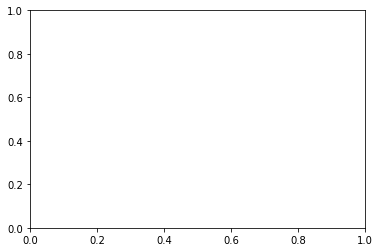

In [130]:
plt.scatter(y_test,predictions) #a linear model is obtained

In [ ]:
y_pred=model.intercept_+model.coef_*x_test
print('predicted response:',y_pred,sep='\n')

In [ ]:
#define new data instance
xnew=[[30]]
#make prediction
ynew=model.predict(xnew)
#show the inputs and predcted outputs
print('new temperature=%s,Predicted O.ring.failures=%s'%(xnew,ynew))

In [ ]:
#define new data instance
xnew=[[70]]
#make prediction
ynew=model.predict(xnew)
#show the inputs and predcted outputs
print('new temperature=%s,Predicted O.ring.failures=%s'%(xnew,ynew))

In [ ]:
#observation: as temp increases, oring failures decreases

In [ ]:
#evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
x_train=x_train.reshape(-1,1)
y_train_prediction=model.predict(x_train)
x_test=x_test.reshape(-1,1)
y_test_prediction=model.predict(x_test)

In [ ]:
#model evaluation on training set
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)
print('the model performance on training set')
print("-------")
print('Rmse is{}'.format(rmse_training))
print('R2 score is{}'.format(r2_training))
print('\n')

In [ ]:
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print('the model performance on training set')
print("-------")
print('Rmse is{}'.format(rmse_testing))
print('R2 score is{}'.format(r2_testing))
print('\n')

In [ ]:
#observation : the models rmse of test also increased which is not desired
plt.scatter(x,y)
plt.xlabel('temperature')
plt.ylabel('o.ring.failures')

In [ ]:
x=x.reshape(-1,1)
y_predicted=model.predict(x)
plt.plot(x,y_predicted,color='b')

In [ ]:
#multiple linear regression
x=data[['temperature','pressure']]
y=data['O.ring.failures']
model1=sm.OLS(y,x).fit()
predictions=model1.predict(x)
model1.summary()

In [ ]:
#observation:p(temp)>0.05(alpha) and p(pressure)>0.05



In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [ ]:
x_train


In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
#feature engineering
features=x_train.iloc[:,:].values
features

In [125]:
labels=y_train.iloc[:].values
labels

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [ ]:
x=features
y=labels

In [ ]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(x,y)
predictions=model.predict(x)

In [ ]:
accuracy=model.score(x,y)
print('accuracy of model:',accuracy)

In [ ]:
#observation:even after afding pressure variable,accuracy didnt change hence pressure has no efect

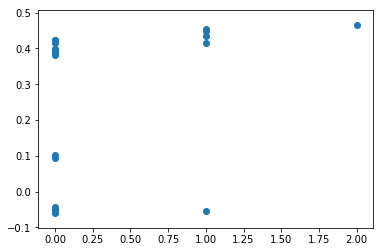

In [126]:
plt.scatter(y,predictions)

In [ ]:
#observation :with both inputs,model is not linear